In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [11]:
MY_PC = '.'
MY_DRIVE = '/content/drive/MyDrive/KFUPM/ICS485 Machine Learning/machine-learning'


working_on = MY_PC

# Reading the data

In [12]:
# Reading the data
df = pd.read_csv(working_on + "/Dataset-vf.csv")

In [13]:
df.head()

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,X11,X12,X15,X13,X14,Y
0,43,59.0,11,120,150,2709,2114,228,217,120,0.66,269,R1,FC11,CA49,BMW
1,0,54.0,7,0,693,2802,162,224,225,136,0.35,195,NaN,FC11,CA50,BMW
2,0,28.0,12,0,1260,2325,162,215,213,133,0.89,750,NaN,FC14,CA26,Mercedes
3,16,112.0,8,272,3649,2837,6221,235,231,128,0.27,-155,NaN,FC11,CA32,Ford
4,10,59.0,7,134,900,2509,5184,226,226,134,0.93,88,NaN,FC11,CA38,BMW


,Column,Non-Null Count,Non-Null %,Dtype,Unique Values,Mean
Y,Y,6124,100.00 %,object,6,NaN
X1,X1,6124,100.00 %,int64,1395,2645.712933
X2,X2,5520,90.14 %,float64,360,151.293659
X3,X3,6124,100.00 %,int64,50,16.794579
X4,X4,6124,100.00 %,int64,257,192.488080
X5,X5,6124,100.00 %,int64,324,47.550621
X6,X6,6124,100.00 %,int64,2037,1541.308459
X7,X7,6124,100.00 %,int64,169,216.777106
X8,X8,6124,100.00 %,int64,137,218.770411
X9,X9,6124,100.00 %,int64,243,129.345852


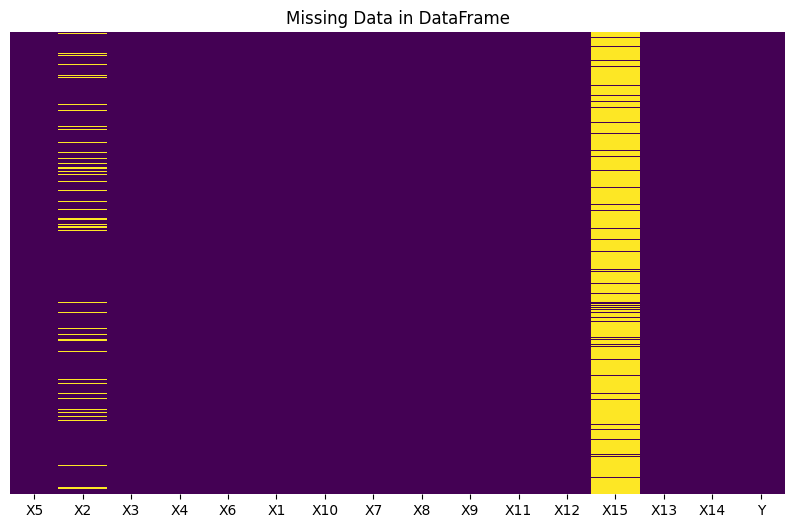

In [14]:
def display_dataframe_summary(dataframe, sort_by='Column'):
    # Select only numeric columns for calculating the sum
    numeric_df = dataframe.select_dtypes(include=[np.number])

    summary = pd.DataFrame({
        'Column': dataframe.columns,
        'Non-Null Count': dataframe.notnull().sum(),
        'Non-Null %': (100 * dataframe.notnull().sum() / len(dataframe)).map("{:.2f} %".format),
        'Dtype': dataframe.dtypes,
        'Unique Values': dataframe.nunique()
    })

    # Add a condition to check if numeric_df is not empty
    if not numeric_df.empty:
        summary['Mean'] = numeric_df.mean()

    # Extracting numerical part from column names for sorting
    summary['Sort Key'] = summary['Column'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)

    # Sorting the summary DataFrame
    if sort_by == 'Column':
        summary = summary.sort_values(by='Sort Key', ascending=True)
    else:
        summary = summary.sort_values(by=sort_by, ascending=True)

    summary = summary.drop('Sort Key', axis=1)  # Remove the auxiliary sort key column

    # Display the summary
    display(summary)

    # Plotting missing data
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataframe.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.title('Missing Data in DataFrame')
    plt.show()

# Call the function with your DataFrame
display_dataframe_summary(df, sort_by='Column')


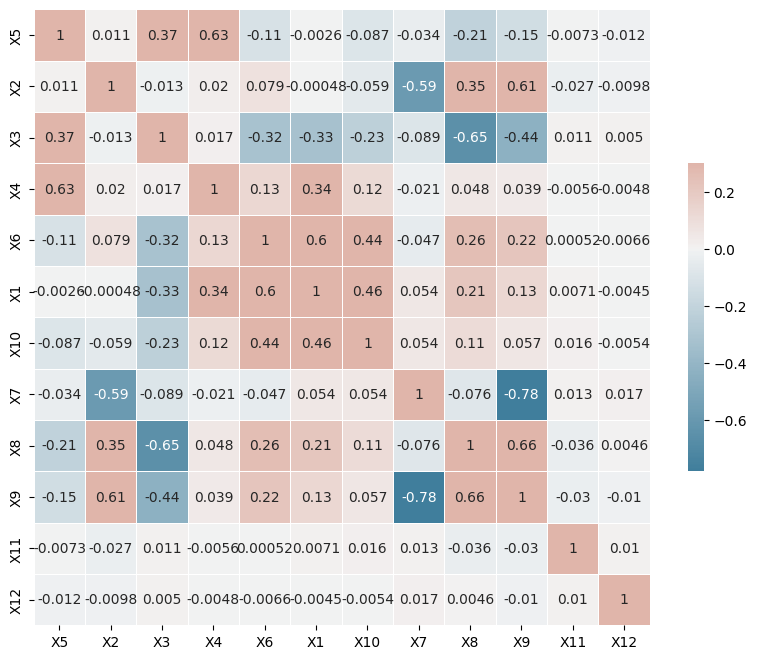

In [15]:
numerical_features = df.select_dtypes(include='number')

# Calculating the correlation matrix for the numerical columns
correlation_matrix = numerical_features.corr()


# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [16]:
classes = df["Y"].unique()
number_of_classes = df["Y"].nunique()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"The classes is: {classes}")
print(f"Number of classes: {number_of_classes}")
print(categorical_cols)

The classes is: ['BMW' 'Mercedes' 'Ford' 'Toyota' 'Honda' 'GMC']
Number of classes: 6
Index(['X15', 'X13', 'X14', 'Y'], dtype='object')


# Preprocessing the Data

In [17]:
X = df.drop(columns = ['X15', 'Y'])  
y = df['Y']              

X = pd.get_dummies(X, dtype="int64")
X = pd.concat([X, df['X15']], axis = 1)

In [18]:
display(X)
display(y)

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15
0,43,59.0,11,120,150,2709,2114,228,217,120,...,0,0,0,0,0,0,0,0,0,R1
1,0,54.0,7,0,693,2802,162,224,225,136,...,1,0,0,0,0,0,0,0,0,NaN
2,0,28.0,12,0,1260,2325,162,215,213,133,...,0,0,0,0,0,0,0,0,0,NaN
3,16,112.0,8,272,3649,2837,6221,235,231,128,...,0,0,0,0,0,0,0,0,0,NaN
4,10,59.0,7,134,900,2509,5184,226,226,134,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6119,14,NaN,18,67,918,2712,1922,201,254,183,...,0,0,0,0,0,0,0,0,0,NaN
6120,1,67.0,6,170,824,3101,1657,227,228,135,...,0,0,0,0,0,0,0,0,0,NaN
6121,-3,139.0,13,30,3127,3050,5770,240,235,123,...,0,0,0,0,0,0,0,0,0,NaN
6122,12,106.0,24,30,582,2080,108,252,202,64,...,0,0,0,0,0,0,0,0,0,NaN


0            BMW
1            BMW
2       Mercedes
3           Ford
4            BMW
          ...   
6119      Toyota
6120      Toyota
6121      Toyota
6122    Mercedes
6123      Toyota
Name: Y, Length: 6124, dtype: object

### Splitting data into Train, Val, Test.

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=777)

len(X_train), len(X_val), len(X_test)


(4286, 919, 919)

### Apply some preprocessing techniques like stander normlization using Pipepline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



numerical_cols = X_train.select_dtypes(include='number').columns


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])



### Handling numerical missing values

In [21]:
mean = X_train['X2'].mean()

X_train['X2'] = X_train['X2'].fillna(mean)
X_val['X2'] = X_val['X2'].fillna(mean)
X_test['X2'] = X_test['X2'].fillna(mean)

print("Missing values in 'X2' column of X_train:", X_train['X2'].isnull().sum())
print("Missing values in 'X2' column of X_val:", X_val['X2'].isnull().sum())
print("Missing values in 'X2' column of X_test:", X_test['X2'].isnull().sum())


Missing values in 'X2' column of X_train: 0
Missing values in 'X2' column of X_val: 0
Missing values in 'X2' column of X_test: 0


In [22]:
X_train.shape, X_val.shape

((4286, 49), (919, 49))

### Semi-Supervised Learning Imputation (to fill categorical missing values)

**MCAR:** is the highest level of randomness and occurs where
missingness of attribute values is independent of the values

**MAR:** occurs when the probability of a case having
a missing value may depend on the known values, but not on the value of the
missing data itself

**NMAR:** occurs when the probability of a case having a missing value for an attribute could depend on the
value of that attribute.


Case and attribute removal with missing data should be applied only if
missing data are MCAR, as not MCAR missing data have non-random elements,
which can make the results biased.

In [23]:
y_train.shape, X_train.shape

((4286,), (4286, 49))

In [24]:
mask = pd.isna(X_train["X15"])

# Apply the mask to both X_train and y_train
labeled_X = X_train[~mask]
labeled_y = y_train[~mask]
labeled = pd.concat([labeled_X, labeled_y], axis=1)  # Rows where X15 is not NaN

unlabeled_X = X_train[mask]
unlabeled_y = y_train[mask]
unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)   # Rows where X15 is NaN


labeled = pd.get_dummies(labeled, columns = ["Y"], dtype="int64")
unlabeled = pd.get_dummies(unlabeled, columns = ["Y"], dtype="int64")



print(f"number of labeled data: {len(labeled)}, and number of features: {len(labeled.columns)}")
print(f"number of unlabeled data: {len(unlabeled)}, and number of features: {len(unlabeled.columns)}")
print(f"labeled + unlabeled: {len(labeled) + len(unlabeled)}")


number of labeled data: 417, and number of features: 55
number of unlabeled data: 3869, and number of features: 55
labeled + unlabeled: 4286


In [25]:
display(labeled.sample(1))
display(unlabeled.sample(1))

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
3714,0,152.424877,25,0,531,2020,511,174,186,143,...,0,0,0,R1,0,0,0,0,1,0


,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA58,X14_ CA59,X14_ CA60,X15,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
2557,216,17.0,32,495,495,3087,1852,177,158,101,...,0,0,0,NaN,0,0,0,0,0,1


In [26]:
X15_features_labeled = labeled.drop('X15', axis=1)
X15_values_labeled = labeled['X15']

X15_features_unlabeled = unlabeled.drop('X15', axis=1)
X15_values_unlabeled = unlabeled['X15']

print(f"X_label and Y_label length before using Semi-Supervised: {len(X15_features_labeled)}")
print(f"Unlabeled data len: {len(X15_features_unlabeled)}")


X_label and Y_label length before using Semi-Supervised: 417
Unlabeled data len: 3869


In [27]:

X15_values_labeled.shape

(417,)

In [28]:
print(f"Available labels: {X15_values_labeled.unique()}")
for label in X15_values_labeled.unique():
    print(f"Label {label} count: {len(X15_values_labeled[X15_values_labeled == label])}")

Available labels: ['R2' 'R1' 'R3']
Label R2 count: 124
Label R1 count: 136
Label R3 count: 157


#### Removing R label

In [29]:
# Since we have only one sample with the value R then let us remove it

X15_values_labeled = X15_values_labeled[X15_values_labeled != 'R']
X15_features_labeled = X15_features_labeled.loc[X15_values_labeled.index]
X15_classes = X15_values_labeled.unique()
print(f"Available labels: {X15_classes}")
for label in X15_values_labeled.unique():
    print(f"Label {label} count: {len(X15_values_labeled[X15_values_labeled == label])}")

Available labels: ['R2' 'R1' 'R3']
Label R2 count: 124
Label R1 count: 136
Label R3 count: 157


In [30]:
X15_features_unlabeled

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,Y_BMW,Y_Ford,Y_GMC,Y_Honda,Y_Mercedes,Y_Toyota
5790,50,208.000000,27,108,1315,2733,1589,190,252,184,...,0,0,0,0,1,0,0,0,0,0
4035,6,126.000000,18,30,886,2094,792,247,225,98,...,0,0,0,0,0,0,0,0,1,0
3031,60,73.000000,14,212,218,2731,1973,236,213,105,...,0,0,0,0,1,0,0,0,0,0
4106,0,152.424877,4,0,1996,2882,1465,218,243,161,...,0,0,0,0,1,0,0,0,0,0
303,37,104.000000,15,170,2405,3320,2663,245,219,99,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,45,161.000000,15,361,2881,3401,1801,234,242,135,...,0,0,0,0,0,0,0,0,0,1
5789,20,152.424877,15,150,2881,3159,3518,231,209,106,...,0,0,0,0,0,0,0,0,0,1
2119,0,4.000000,7,0,1048,2280,371,211,227,153,...,0,0,0,0,0,0,0,0,1,0
4017,87,347.000000,13,350,1825,2805,994,196,219,162,...,0,0,0,0,1,0,0,0,0,0


In [31]:


X_train_labeled, X_val_labeled, y_train_labeled, y_val_labeled = train_test_split(
    X15_features_labeled, X15_values_labeled, test_size=0.15, random_state=777)

model = MLPClassifier(random_state=777, max_iter=1000, solver='adam', hidden_layer_sizes=(100,))

model.fit(X_train_labeled, y_train_labeled)

# Initialize lists to store F1-scores
f1_scores_train = []
f1_scores_val = []
epoch = 1
while len(X15_features_unlabeled) > 0:
    probas = model.predict_proba(X15_features_unlabeled)
    predictions = model.predict(X15_features_unlabeled)

    sure_indices = [i for i, probabilities in enumerate(probas) if max(probabilities) > 0.99]

    if len(sure_indices) == 0:
        break

    sure_samples = X15_features_unlabeled.iloc[sure_indices]
    sure_labels = pd.Series(predictions[sure_indices], index=sure_samples.index)

    X_train_labeled = pd.concat([X_train_labeled, sure_samples])
    y_train_labeled = pd.concat([y_train_labeled, sure_labels])

    X15_features_unlabeled = X15_features_unlabeled.drop(sure_samples.index)

    model.fit(X_train_labeled, y_train_labeled)

    # Calculate and store F1-scores
    train_predictions = model.predict(X_train_labeled)
    val_predictions = model.predict(X_val_labeled)

    train_f1 = f1_score(y_train_labeled, train_predictions, average='macro')
    val_f1 = f1_score(y_val_labeled, val_predictions, average='macro')
    print(f"Train F1 score: {train_f1:.2f}")
    print(f"Validation F1 score: {val_f1:.2f}")
    print(f"Samples labeled in epoch {epoch}: {len(sure_indices)}")
    print(f"X trainin new shape: {X_train_labeled.shape}\n")

    f1_scores_train.append(train_f1)
    f1_scores_val.append(val_f1)

    epoch += 1

print(f"X_label and Y_label length after using Semi-Supervised: {len(X_train_labeled)}")
print(f"Unlabeled data len: {len(X15_features_unlabeled)}")


Train F1 score: 0.84
Validation F1 score: 0.29
Samples labeled in epoch 1: 1657
X trainin new shape: (2011, 54)

Train F1 score: 0.69
Validation F1 score: 0.22
Samples labeled in epoch 2: 776
X trainin new shape: (2787, 54)

Train F1 score: 0.86
Validation F1 score: 0.26
Samples labeled in epoch 3: 825
X trainin new shape: (3612, 54)

Train F1 score: 0.86
Validation F1 score: 0.21
Samples labeled in epoch 4: 103
X trainin new shape: (3715, 54)

Train F1 score: 0.88
Validation F1 score: 0.21
Samples labeled in epoch 5: 36
X trainin new shape: (3751, 54)

Train F1 score: 0.91
Validation F1 score: 0.17
Samples labeled in epoch 6: 44
X trainin new shape: (3795, 54)

Train F1 score: 0.85
Validation F1 score: 0.27
Samples labeled in epoch 7: 6
X trainin new shape: (3801, 54)

Train F1 score: 0.79
Validation F1 score: 0.27
Samples labeled in epoch 8: 79
X trainin new shape: (3880, 54)

Train F1 score: 0.82
Validation F1 score: 0.22
Samples labeled in epoch 9: 63
X trainin new shape: (3943, 54

In [32]:
len(f1_scores_val),len(f1_scores_train) 

(15, 15)

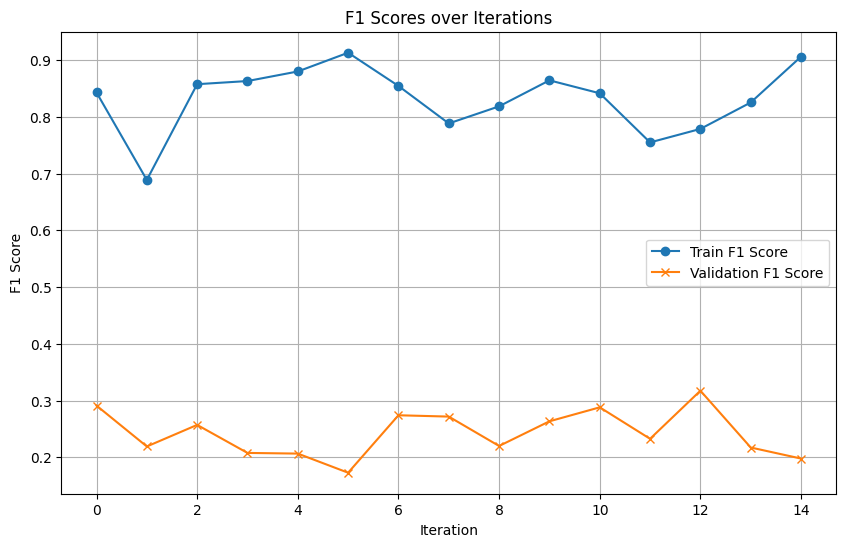

In [33]:
# Plotting the F1-scores
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1_scores_train)), f1_scores_train, label='Train F1 Score', marker='o')
plt.plot(range(len(f1_scores_val)), f1_scores_val, label='Validation F1 Score', marker='x')
plt.xlabel('Iteration')
plt.ylabel('F1 Score')
plt.title('F1 Scores over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
X15_features_labeled = pd.concat([X_train_labeled, X_val_labeled])
X15_values_labeled = pd.concat([y_train_labeled, y_val_labeled])

#### Updating X_train, X_val, and X_test with the new X15 column

In [35]:
def process_data(X, y, model, feature_name):
    # Mask for missing values in the specified feature
    mask = pd.isna(X[feature_name])

    # Labeled Data
    labeled_X = X[~mask]
    labeled_y = y[~mask].to_frame(name='Y')
    labeled_y = pd.get_dummies(labeled_y,  dtype="int64")
    labeled = pd.concat([labeled_X, labeled_y], axis=1)

    # Unlabeled Data
    unlabeled_X = X[mask]
    unlabeled_y = y[mask].to_frame(name='Y')
    unlabeled_y = pd.get_dummies(unlabeled_y, dtype="int64")

    unlabeled = pd.concat([unlabeled_X, unlabeled_y], axis=1)
    X_unlabeled = unlabeled.drop(feature_name, axis=1)

    # Predict and fill missing values
    X.loc[mask, feature_name] = model.predict(X_unlabeled)


    return labeled, unlabeled

# Process training data
columns_to_drop = ['Y_BMW', 'Y_Ford', 'Y_GMC', 'Y_Honda', 'Y_Mercedes', 'Y_Toyota']
X15_features_labeled = X15_features_labeled.drop(columns=columns_to_drop, axis=1)
X_train = pd.concat([X15_features_labeled, X15_values_labeled.to_frame(name='X15')], axis = 1)
y_train = y_train.loc[X_train.index]

# Process validation data
val_labeled, val_unlabeled = process_data(X_val, y_val, model, 'X15')

# Process testing data
test_labeled, test_unlabeled = process_data(X_test, y_test, model, 'X15')

# Print lengths
print(f"number of train labeled data: {len(X15_features_labeled)}")
print(f"number of val labeled data: {len(val_labeled)}")
print(f"number of test labeled data: {len(test_labeled)}")


number of train labeled data: 4199
number of val labeled data: 97
number of test labeled data: 87


In [36]:
X_train

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA50,X14_ CA51,X14_ CA52,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15
2394,32,60.000000,8,391,153,2731,847,226,224,132,...,0,0,0,0,0,0,0,0,0,R3
5955,49,291.000000,20,124,1353,2387,836,160,233,210,...,0,0,0,0,0,0,0,0,0,R1
2412,42,152.424877,33,95,1308,2120,577,110,215,234,...,0,0,0,0,0,0,0,0,0,R2
2768,0,152.424877,8,0,5014,3079,2140,226,223,132,...,0,0,0,0,0,0,0,0,0,R3
3745,44,240.000000,17,120,474,2108,752,186,252,201,...,0,0,0,0,0,0,0,0,0,R3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,1,325.000000,4,30,4774,2937,2084,210,235,163,...,0,0,0,0,0,0,0,0,0,R1
5505,0,105.000000,13,0,850,2242,451,242,223,109,...,0,0,0,0,0,0,0,0,0,R1
2050,0,205.000000,4,0,882,2187,395,217,243,162,...,0,0,0,0,0,0,0,0,0,R2
5454,270,181.000000,10,488,1466,2346,1048,224,247,155,...,0,0,0,0,0,0,0,0,0,R3


In [37]:
X_train = pd.get_dummies(X_train, columns = ["X15"],  dtype="int64")
X_val = pd.get_dummies(X_val, columns = ["X15"],  dtype="int64")
X_test = pd.get_dummies(X_test, columns = ["X15"],  dtype="int64")

In [38]:
X_train.shape, X_val.shape, X_test.shape

((4199, 51), (919, 51), (919, 52))

In [39]:
X_test

,X5,X2,X3,X4,X6,X1,X10,X7,X8,X9,...,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R,X15_R1,X15_R2,X15_R3
5861,0,353.0,13,0,1103,2116,443,196,216,157,...,0,0,0,0,0,0,0,0,1,0
2067,0,342.0,7,0,3472,3067,2912,206,230,162,...,0,0,0,0,0,0,0,1,0,0
3275,82,352.0,26,150,3697,2847,5796,166,187,152,...,0,0,0,0,0,0,0,0,1,0
5127,103,166.0,15,270,1027,2886,2965,231,244,140,...,0,0,0,0,0,0,0,1,0,0
4350,0,166.0,9,60,2895,3214,2430,228,244,148,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,133,137.0,24,342,1146,2258,607,249,222,87,...,0,0,0,0,0,0,0,0,0,1
4607,114,114.0,19,319,1148,2294,1199,249,218,89,...,0,0,0,0,0,0,0,1,0,0
1192,57,188.0,32,95,342,2413,1061,205,243,149,...,0,0,0,0,0,0,0,0,1,0
2962,0,258.0,10,0,600,2313,598,197,246,188,...,0,0,0,0,0,0,0,0,1,0


### Applying the pipeline

In [40]:
selected_columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12"]  # The columns to transform
transformed_train = pipeline.fit_transform(X_train[selected_columns])

transformed_train_df = pd.DataFrame(transformed_train, index=X_train.index, columns=selected_columns)
X_train = pd.concat([transformed_train_df, X_train.drop(columns=selected_columns)], axis=1)

transformed_val = pipeline.transform(X_val[selected_columns])
transformed_test = pipeline.transform(X_test[selected_columns])

transformed_val_df = pd.DataFrame(transformed_val, index=X_val.index, columns=selected_columns)
X_val = pd.concat([transformed_val_df, X_val.drop(columns=selected_columns)], axis=1)

transformed_test_df = pd.DataFrame(transformed_test, index=X_test.index, columns=selected_columns)
X_test = pd.concat([transformed_test_df, X_test.drop(columns=selected_columns)], axis=1)

In [41]:
X_train["X12"].std()

1.0001190972433214

In [42]:
print(f"Length train (X, y): {(len(X_train), len(y_train))}")
print(f"Length val (X, y): {(len(X_val), len(y_val))}")
print(f"Length test (X, y): {(len(X_test), len(y_test))}")

Length train (X, y): (4199, 4199)
Length val (X, y): (919, 919)
Length test (X, y): (919, 919)


In [43]:
y_train.shape

(4199,)

In [44]:
# Verify and reset index for training data
if not X_train.index.equals(y_train.index):
    X_train.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
train_data = pd.concat([X_train, y_train], axis=1)

# Verify and reset index for validation data
if not X_val.index.equals(y_val.index):
    X_val.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
val_data = pd.concat([X_val, y_val], axis=1)

# Verify and reset index for test data
if not X_test.index.equals(y_test.index):
    X_test.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)
test_data = pd.concat([X_test, y_test], axis=1)


assert all(X_train.index == y_train.index), "Indexes of X_train and y_train do not match."
assert all(X_val.index == y_val.index), "Indexes of X_val and y_val do not match."
assert all(X_test.index == y_test.index), "Indexes of X_test and y_test do not match."



### Feature Selection

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel
print(f"X train shape before: {X_train.shape}")
print(f"X val shape before: {X_val.shape}")
print(f"X test shape before: {X_test.shape}")


clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train)
# print(clf.feature_importances_  )

model = SelectFromModel(clf, prefit=True)
X_train = model.transform(X_train)
X_val = model.transform(X_val)
X_test = model.transform(X_test)

print(f"X train shape after: {X_train.shape}")
print(f"X val shape after: {X_val.shape}")
print(f"X test shape after: {X_test.shape}")


X train shape before: (4199, 51)
X val shape before: (919, 51)
X test shape before: (919, 52)


c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\ammar\OneDrive\Desktop\ICS 485 project\machine-learning\.venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


IndexError: boolean index did not match indexed array along dimension 1; dimension is 52 but corresponding boolean dimension is 51

In [ ]:
directory = "preprocessed_data"

if not os.path.exists(directory):
    os.makedirs(directory)

train_data.to_csv(working_on + '/preprocessed_data/train_data.csv', index=False)
val_data.to_csv(working_on + '/preprocessed_data/val_data.csv', index=False)
test_data.to_csv(working_on + '/preprocessed_data/test_data.csv', index=False)

In [ ]:
train_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14_ CA53,X14_ CA54,X14_ CA55,X14_ CA58,X14_ CA59,X14_ CA60,X15_R1,X15_R2,X15_R3,Y
1448,-1.007786,-0.000544,0.924464,-0.697987,-0.334397,-0.826811,1.197546,-0.387438,-1.230982,0.333122,...,0,0,0,0,0,0,0,0,1,Mercedes
3674,-1.514967,1.622085,-0.743079,-1.074390,-0.828481,-0.844427,-0.759763,0.589630,1.018781,-1.042734,...,0,0,0,0,0,0,0,0,1,Mercedes
5265,-0.770762,1.050155,0.924464,0.684029,0.089103,-0.302898,-2.086752,1.141886,1.968222,-0.608345,...,0,0,0,0,0,0,0,1,0,Mercedes
1092,-0.087724,0.018637,0.257447,0.616613,0.142041,0.029527,0.733100,0.802036,-0.157701,0.778896,...,0,0,0,0,0,0,0,1,0,Honda
5605,1.102495,-0.000544,0.257447,-0.905851,-0.581439,0.422461,-1.257384,-0.514882,0.729820,1.578486,...,0,0,0,0,0,0,0,1,0,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169,0.618252,0.958238,-0.965419,-1.074390,-0.828481,0.115313,-0.461190,1.184367,1.080701,0.099288,...,0,0,0,0,0,0,0,0,1,BMW
1173,-1.040919,1.846772,1.924990,0.358188,1.641938,-0.280685,-3.048819,-1.831800,1.018781,-0.276424,...,0,0,0,0,0,0,0,0,1,Honda
2894,0.322608,-0.042641,0.257447,0.807624,0.953750,0.165866,0.832624,0.632111,-0.343461,-0.336853,...,0,0,0,0,0,0,0,0,1,BMW
2170,0.651384,-1.462254,-0.409571,-0.905851,-0.740252,2.528836,-0.394841,-0.259994,0.296380,0.211388,...,0,0,0,0,0,0,0,1,0,BMW
